# Create a complete water solubility dataset from difference sources

In [1]:
import pandas as pd
import rdkit 
from rdkit import Chem
from rdkit.Chem import MolFromSmiles

from rdkit.Chem import PandasTools

RDKit WARNING: [10:55:10] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
from collections import defaultdict

In [3]:
import pickle

## 1. Delaney dataset
https://figshare.com/articles/ESOL_Estimating_Aqueous_Solubility_Directly_from_Molecular_Structure/7944677

In [5]:
# path to solubility.txt may need to be changed. 
df1 = pd.read_csv('/Users/dongdongzhang/Desktop/group/ws/solubility.txt')

In [6]:
df1.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [7]:
df1.shape

(1144, 4)

In [8]:
df1['Mol'] = [Chem.MolFromSmiles(i) for i in df1['SMILES']]

In [9]:
df1_use1 = df1[~pd.isnull(df1['Mol'])].reset_index(drop=True)

In [10]:
df1_use1.shape

(1144, 5)

In [11]:
df1_use1['InChI'] = [Chem.MolToInchi(i) for i in df1_use1['Mol']]

RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Charges were rearranged
RDKit WARNING: [11:51:19] WARNING: Charges were r

In [12]:
df1_use1['Mol_From_InchI'] = [Chem.MolFromInchi(i) for i in df1_use1['InChI']]

In [13]:
df1_use1['InChI_from_InchI'] = [Chem.MolToInchi(i) for i in df1_use1['Mol_From_InchI']]

RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:19] WARNING: Omitt

RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Charges were rearranged
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitte

In [14]:
df1_use2 = df1_use1[df1_use1['InChI'] == df1_use1['InChI_from_InchI']]

In [15]:
df1_use2.shape

(1144, 8)

In [16]:
df1_use3 = df1_use2[['SMILES', 'InChI', 'measured log(solubility:mol/L)']]

In [17]:
df1_use3.rename(columns={'measured log(solubility:mol/L)': 'logS'}, inplace=True)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [18]:
df1_use3['source'] = 'Delaney'

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df1_use3.head()

,SMILES,InChI,logS,source
0,ClCC(Cl)(Cl)Cl,"InChI=1S/C2H2Cl4/c3-1-2(4,5)6/h1H2",-2.18,Delaney
1,CC(Cl)(Cl)Cl,"InChI=1S/C2H3Cl3/c1-2(3,4)5/h1H3",-2.00,Delaney
2,ClC(Cl)C(Cl)Cl,InChI=1S/C2H2Cl4/c3-1(4)2(5)6/h1-2H,-1.74,Delaney
3,ClCC(Cl)Cl,"InChI=1S/C2H3Cl3/c3-1-2(4)5/h2H,1H2",-1.48,Delaney
4,FC(F)(Cl)C(F)(Cl)Cl,"InChI=1S/C2Cl3F3/c3-1(4,6)2(5,7)8",-3.04,Delaney


In [52]:
df1_use3.to_csv('/Users/dongdongzhang/Desktop/group/ws/delaney_processed.csv', index=False)

## 2. PhysProp
https://figshare.com/articles/The_importance_of_data_curation_on_QSAR_Modeling_PHYSPROP_open_data_as_a_case_study/5071291

In [20]:
df2 = pd.read_csv('/Users/dongdongzhang/Desktop/group/ws/WS_data.csv')

In [21]:
df2.head()

,ChemID,CAS,CAS_checksum,NAME,name_error,preferred_name,iupac,SMILES,STAR_flag,New STAR flag,...,O[K],[Li]O,O[Na],ClCCl,ClC(Cl)Cl,CCOC(C)=O,CO,CC(C)O,OS(F)(=O)=O,CC(=O)OS(O)(=O)=O
0,100001.0,50-00-0,ValidCAS,FORMALDEHYDE,Ok,Formaldehyde,formaldehyde,C=O,3 STAR,4 STAR: Smiles generated,...,0,0,0,0,0,0,0,0,0,0
1,100002.0,"50-02-2, 378-44-9",ValidCAS,"DEXAMETHASONE, BETAMETHASONE",NaN,Dexamethasone,"(11beta,16alpha)-9-fluoro-11,17,21-trihydroxy-...",C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,"2 STAR Enhanced Stereochemistry: Molfile, CAS","4 STAR: Name retrieved from DSSTOX, Smiles gen...",...,0,0,0,0,0,0,0,0,0,0
2,100003.0,50-03-3,ValidCAS,HYDROCORTISONE ACETATE,NaN,Hydrocortisone acetate,"(8xi,9xi,11beta,14xi)-11,17-dihydroxy-3,20-dio...",CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,"2 STAR Enhanced Stereochemistry: Molfile, CAS","4 STAR: Name retrieved from DSSTOX, Smiles gen...",...,0,0,0,0,0,0,0,0,0,0
3,100004.0,50-04-4,ValidCAS,CORTISONE ACETATE,NaN,Cortisone acetate,"17-hydroxy-3,11,20-trioxopregn-4-en-21-yl acetate",CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,"2 STAR Enhanced Stereochemistry: Molfile, CAS","4 STAR: Name retrieved from DSSTOX, Smiles gen...",...,0,0,0,0,0,0,0,0,0,0
4,100005.0,50-06-6,ValidCAS,PHENOBARBITAL,NaN,Phenobarbital,"5-ethyl-5-phenylpyrimidine-2,4,6(1H,3H,5H)-trione",CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,"2 STAR: Molfile, CAS","4 STAR: Name retrieved from DSSTOX, Smiles gen...",...,0,0,0,0,0,0,0,0,0,0


In [22]:
df2.shape

(2010, 270)

In [23]:
df2_use1 = df2[['SMILES', 'LogMolar', 'WS Data Type']]

In [24]:
df2_use2 = df2_use1[df2_use1['WS Data Type'] == 'EXP'].reset_index(drop=True)

In [25]:
df2_use3 = df2_use2[['SMILES', 'LogMolar']]

In [26]:
df2_use3.rename(columns={'LogMolar': 'logS'}, inplace=True)

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [27]:
df2_use3['Mol'] = [Chem.MolFromSmiles(i) for i in df2_use3['SMILES']]

In [28]:
df2_use4 = df2_use3[~pd.isnull(df2_use3['Mol'])]

In [29]:
df2_use4.shape

(2002, 3)

In [30]:
df2_use4['InChI'] = [Chem.MolToInchi(i) for i in df2_use4['Mol']]

RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Charges were rearranged
RDKit WARNING: [11:51:24] WARNING: Charges were rearranged
RDKit WARNING: [11:51:24] WARNING: Charges were rearranged
RDKit WARNING: [11:51:24] WARNING: Charges were rearranged
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted undefined stereo
RDKit WARNING: [11:51:24] WARNING: Omitted u

RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted und

In [31]:
df2_use4['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in df2_use4['InChI']]

In [32]:
df2_use4['InChI_From_InChI'] = [Chem.MolToInchi(i) for i in df2_use4['Mol_From_InChI']]

RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Charges were rearranged
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:42] WARNING: Omitted u

RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Charges were rearranged
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Charges were rearranged
RDKit WARNING: [13:35:44] WARNING: Charges were rearranged
RDKit WARNING: [13:35:44] WARNING: Charges were rearranged
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Charges were rearranged
RDKit WARNING: [13:35:44] WARNING: Charges were rearranged
RDKit WARNING: [13:35:44] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:44] WARNING: Charges wer

In [33]:
df2_use4 = df2_use4[df2_use4['InChI'] == df2_use4['InChI_From_InChI']]

In [34]:
df2_use4.shape

(2002, 6)

In [35]:
df2_use5 = df2_use4[['SMILES', 'InChI', 'logS']]

In [36]:
df2_use5['source'] = 'PhysProp'

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df2_use5.head()

,SMILES,InChI,logS,source
0,C=O,InChI=1S/CH2O/c1-2/h1H2,1.1210,PhysProp
1,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,InChI=1S/C22H29FO5/c1-12-8-16-15-5-4-13-9-14(2...,-3.7075,PhysProp
2,CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,InChI=1S/C23H32O6/c1-13(24)29-12-19(27)23(28)9...,-4.4580,PhysProp
3,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,InChI=1S/C23H30O6/c1-13(24)29-12-19(27)23(28)9...,-4.3040,PhysProp
4,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,InChI=1S/C12H12N2O3/c1-2-12(8-6-4-3-5-7-8)9(15...,-2.3210,PhysProp


In [37]:
df2_use5.shape

(2002, 4)

In [53]:
df2_use5.to_csv('/Users/dongdongzhang/Desktop/group/ws/physprop_processed.csv', index=False)

## 3. Zang et al. 

In [39]:
df3 = pd.read_excel('/Users/dongdongzhang/Desktop/group/ws//ci6b00625_si_002.xlsx', sheet_name='LogS')

In [40]:
df3.head()

,CAS RN,NAME,Preferred_name,IUPAC Name,SMILES,LogS-Measured,LogS-EPISuite Prediction,LogS-Prediction from our model,Training/Test
0,50-00-0,FORMALDEHYDE,Formaldehyde,formaldehyde,C=O,1.1210,0.2620,1.004066,Training
1,"50-02-2, 378-44-9","DEXAMETHASONE, BETAMETHASONE",Dexamethasone,"(11beta,16alpha)-9-fluoro-11,17,21-trihydroxy-...",C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,-3.7075,-4.3915,-3.524658,Training
2,50-03-3,HYDROCORTISONE ACETATE,Hydrocortisone acetate,"(8xi,9xi,11beta,14xi)-11,17-dihydroxy-3,20-dio...",CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,-4.4580,-4.6070,-4.177264,Training
3,50-06-6,PHENOBARBITAL,Phenobarbital,"5-ethyl-5-phenylpyrimidine-2,4,6(1H,3H,5H)-trione",CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,-2.3210,-2.8360,-2.431096,Training
4,50-11-3,METHARBITAL,Metharbital,"5,5-diethyl-1-methylpyrimidine-2,4,6(1H,3H,5H)...",CN1C(=O)NC(=O)C(CC)(CC)C1=O,-2.0000,-2.2290,-1.720520,Training


In [41]:
df3_use = df3[['SMILES', 'LogS-Measured', 'Training/Test']]

In [42]:
df3_use.shape

(2010, 3)

In [43]:
df3_use.head()

,SMILES,LogS-Measured,Training/Test
0,C=O,1.1210,Training
1,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,-3.7075,Training
2,CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,-4.4580,Training
3,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,-2.3210,Training
4,CN1C(=O)NC(=O)C(CC)(CC)C1=O,-2.0000,Training


In [44]:
df3_use['Mol'] = [Chem.MolFromSmiles(i) for i in df3_use['SMILES']]

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df3_use1 = df3_use[~pd.isnull(df3_use['Mol'])]

In [46]:
df3_use1.shape

(2010, 4)

In [47]:
df3_use1['InChI'] = [Chem.MolToInchi(i) for i in df3_use1['Mol']]

RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Charges were rearranged
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Charges were rearranged
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Charges were rearranged
RDKit WARNING: [13:35:45] WARNING: Omitted undefined stereo
RDKit WARNING: [13:35:45] WARNING: Charges 

RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Charges w

RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Charges were rearranged
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:47] WARNING: Omitted un

In [48]:
df3_use1['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in df3_use1['InChI']]

In [49]:
df3_use1['InChI_From_InChI'] = [Chem.MolToInchi(i) for i in df3_use1['Mol_From_InChI']]

RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Charges were rearranged
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Charges were rearranged
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Charges were rearranged
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:48] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted 

RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Charges were rearranged
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:00:49] WARNING: Omitted undefined stereo
RDKit WARNING: [

In [50]:
df3_use1 = df3_use1[df3_use1['InChI'] == df3_use1['InChI_From_InChI']]

In [54]:
df3_use1.shape

(2010, 7)

In [62]:
test = df3_use1[df3_use1['Training/Test'] == 'Test'].reset_index(drop=True)

In [68]:
test.head()

,SMILES,logS,Training/Test,Mol,InChI,Mol_From_InChI,InChI_From_InChI
0,CC(=O)OCC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=...,-4.304,Test,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C23H30O6/c1-13(24)29-12-19(27)23(28)9...,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C23H30O6/c1-13(24)29-12-19(27)23(28)9...
1,CC(O)C(O)=O,1.045,Test,"<img data-content=""rdkit/molecule"" src=""data:i...","InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)","<img data-content=""rdkit/molecule"" src=""data:i...","InChI=1S/C3H6O3/c1-2(4)3(5)6/h2,4H,1H3,(H,5,6)"
2,ClC(Cl)(Cl)C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,-7.809,Test,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C14H9Cl5/c15-11-5-1-9(2-6-11)13(14(17...,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C14H9Cl5/c15-11-5-1-9(2-6-11)13(14(17...
3,COC(=O)[C@@H]1C2CCC(C[C@@H]1OC(=O)c1ccccc1)[N@...,-2.227,Test,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C17H21NO4/c1-18-12-8-9-13(18)15(17(20...,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C17H21NO4/c1-18-12-8-9-13(18)15(17(20...
4,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc12,-5.097,Test,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C17H19ClN2S/c1-19(2)10-5-11-20-14-6-3...,"<img data-content=""rdkit/molecule"" src=""data:i...",InChI=1S/C17H19ClN2S/c1-19(2)10-5-11-20-14-6-3...


In [63]:
test = test.rename(columns={'LogS-Measured': 'logS'})

In [64]:
test[['SMILES', 'InChI', 'logS']].to_csv('/Users/dongdongzhang/Desktop/group/ws/test.csv', index=False)

In [71]:
df3_use2 = df3_use1[df3_use1['Training/Test'] == 'Training'].reset_index(drop=True)

In [74]:
df3_use2 = df3_use2.rename(columns={'LogS-Measured': 'logS'})

In [75]:
df3_use2 = df3_use2[['SMILES', 'InChI', 'logS']]

In [73]:
len(set(test['InChI_From_InChI']) & set(df3_use2['InChI_From_InChI']))

0

In [76]:
df3_use2['source'] = 'zang'

In [77]:
df3_use2.shape

(1507, 4)

In [78]:
df3_use2.head()

,SMILES,InChI,logS,source
0,C=O,InChI=1S/CH2O/c1-2/h1H2,1.1210,zang
1,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,InChI=1S/C22H29FO5/c1-12-8-16-15-5-4-13-9-14(2...,-3.7075,zang
2,CC(=O)OCC(=O)[C@@]1(O)CCC2C3CCC4=CC(=O)CC[C@]4...,InChI=1S/C23H32O6/c1-13(24)29-12-19(27)23(28)9...,-4.4580,zang
3,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,InChI=1S/C12H12N2O3/c1-2-12(8-6-4-3-5-7-8)9(15...,-2.3210,zang
4,CN1C(=O)NC(=O)C(CC)(CC)C1=O,InChI=1S/C9H14N2O3/c1-4-9(5-2)6(12)10-8(14)11(...,-2.0000,zang


In [80]:
df3_use2.to_csv('/Users/dongdongzhang/Desktop/group/ws/zang_processed.csv', index=False)

## 5. ONES
https://figshare.com/articles/Open_Notebook_Science_Challenge_Solubility_Dataset/1514952

In [93]:
df5 = pd.read_csv('/Users/dongdongzhang/Desktop/group/ws/ones.csv')

In [94]:
df5.head()

,Experiment Number (900 series refer to external references),solute,solute SMILES,solvent,concentration (M),csid,solubility,Unnamed: 7
0,1287.0,(1-diethylamino-1-oxopropan-2-yl) benzoate,C(=O)(C(OC(=O)c1ccccc1)C)N(CC)CC,water,0.008017,10440027.0,-2.096,NaN
1,1287.0,"(1,1-dioxido-1,2-thiazinan-2-yl)acetic acid",S1(=O)(=O)N(CC(=O)O)CCCC1,water,0.260016,21436929.0,-0.585,NaN
2,1287.0,"(1,2-dibromo-2,2-dichloroethyl) dimethyl phosp...",BrC(Cl)(Cl)C(Br)OP(=O)(OC)OC,water,0.005248,4267.0,-2.280,NaN
3,1287.0,"(1,2,4,5-tetraacetyloxy-1-methoxypentan-3-yl) ...",C(C(C(OC(=O)C)OC)OC(=O)C)(C(OC(=O)C)COC(=O)C)O...,water,0.015276,10469001.0,-1.816,NaN
4,1287.0,"(1,4-diethoxy-1,4-dioxobutan-2-yl)sulfanyl-hyd...",P(=O)(SC(C(=O)OCC)CC(=O)OCC)(OC)OC,water,0.000461,14674.0,-3.336,NaN


In [95]:
df5.shape

(4011, 8)

In [96]:
df5_use = df5[['solute SMILES', 'solubility']]

In [97]:
df5_use.columns = ['SMILES', 'logS']

In [100]:
from utils import *

In [101]:
df5_use['Mol'] = df5_use['SMILES'].apply(lambda x: getmol(x))

RDKit ERROR: [14:00:50] WARNING: Charges were [14:26:55] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 12 13 14 15 16 17
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24 25 26 27 28
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
RDKit ERROR: 
RDKit ERROR: [14:26:56] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16

In [102]:
df5_use.shape

(4011, 3)

In [103]:
df5_use1 = df5_use[~pd.isnull(df5_use['Mol'])].reset_index(drop=True)

In [104]:
df5_use1.shape

(3972, 3)

In [105]:
df5_use1['InChI'] = [Chem.MolToInchi(i) for i in df5_use1['Mol']]

RDKit WARNING: rearranged; Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Charges were rearranged
RDKit WARNING: [14:00:50] WARNING: Charges were rearranged
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Charges were rearranged
RDKit WARNING: [14:00:50] WARNING: Charges were rearranged
RDKit WARNING: [14:00:50] WARNING: Omitted undefined stereo
RDKit WARNING: [14:00:50] WARNING: Charges were rearranged
RDKit WARNING: [14:00:50] WA

RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Charges were rearranged
RDKit WARNING: [14:29:41] WARNING: Charges were rearranged
RDKit WARNING: [14:29:41] WARNING: Charges were rearranged
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Charges were rearranged
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted u

RDKit WARNING: [14:29:41] WARNING: Charges were rearranged
RDKit WARNING: [14:29:41] WARNING: Charges were rearranged
RDKit WARNING: [14:29:41] WARNING: Charges were rearranged
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:41] WARNING: Omitted 

RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo


RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Charg

RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Charges were rearranged
RDKit WARNING: [14:29:42] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:42] WARNING: Omitted 

In [106]:
df5_use1['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in df5_use1['InChI']]

In [107]:
df5_use1['InChI_From_InChI'] = [Chem.MolToInchi(i) for i in df5_use1['Mol_From_InChI']]

RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:43] WARNING: Omitt

RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Charges were rearranged
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:45] WARNING: Charge

RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WA

RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29

RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Proton(s) added/removed
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Charges were rearranged
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:46] WARNING: Omitted und

RDKit WARNING: [14:29:47] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Charges were rearranged
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [

In [108]:
df5_use2 = df5_use1[df5_use1['InChI'] == df5_use1['InChI_From_InChI']]

In [109]:
df5_use2.shape

(3972, 6)

In [110]:
df5_use2['source'] = 'ONES'

In [111]:
df5_use3 = df5_use2[['SMILES', 'InChI', 'logS', 'source']]

In [112]:
df5_use3.head()

,SMILES,InChI,logS,source
0,C(=O)(C(OC(=O)c1ccccc1)C)N(CC)CC,InChI=1S/C14H19NO3/c1-4-15(5-2)13(16)11(3)18-1...,-2.096,ONES
1,S1(=O)(=O)N(CC(=O)O)CCCC1,"InChI=1S/C6H11NO4S/c8-6(9)5-7-3-1-2-4-12(7,10)...",-0.585,ONES
2,BrC(Cl)(Cl)C(Br)OP(=O)(OC)OC,"InChI=1S/C4H7Br2Cl2O4P/c1-10-13(9,11-2)12-3(5)...",-2.280,ONES
3,C(C(C(OC(=O)C)OC)OC(=O)C)(C(OC(=O)C)COC(=O)C)O...,InChI=1S/C16H24O11/c1-8(17)23-7-13(24-9(2)18)1...,-1.816,ONES
4,P(=O)(SC(C(=O)OCC)CC(=O)OCC)(OC)OC,InChI=1S/C10H19O7PS/c1-5-16-9(11)7-8(10(12)17-...,-3.336,ONES


In [113]:
df5_use3.shape

(3972, 4)

In [114]:
df5_use3.to_csv('/Users/dongdongzhang/Desktop/group/ws/ones_processed.csv', index=False)

## 6. ADME
https://figshare.com/articles/ADME_Evaluation_in_Drug_Discovery_4_Prediction_of_Aqueous_Solubility_Based_on_Atom_Contribution_Approach/7944449
### Revised from Tetko data set, which is baesd on Huuskonen dataset.

In [117]:
df6 = PandasTools.LoadSDF('/Users/dongdongzhang/Desktop/group/ws/data_set.sdf')

RDKit ERROR: [14:29:47] WARNING: Omitted [14:33:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 386 in file /Users/glandrum/anaconda5/conda-bld/rdkit_1578630500009/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(bond_pin->getBeginAtomIdx(), bond_pin->getEndAtomIdx(), d_graph) .second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:33:13] Unexpected error hit on line 8255


In [118]:
df6.shape

(1289, 5)

In [119]:
df6_use = df6[['ID', 'logS']]

In [120]:
df6_use.columns = ['SMILES', 'logS']

In [121]:
df6_use['Mol'] = df6_use['SMILES'].apply(lambda x: getmol(x))

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
df6_use1 = df6_use[~pd.isnull(df6_use['Mol'])].reset_index(drop=True)

In [123]:
df6_use1.shape

(1289, 3)

In [124]:
df6_use1['InChI'] = [Chem.MolToInchi(i) for i in df6_use1['Mol']]

RDKit WARNING: undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Charges were rearranged
RDKit WARNING: [14:29:47] WARNING: Charges were rearranged
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARNING: [14:29:47] WARNING: Omitted undefined stereo
RDKit WARN

RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Charges were rearranged
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Charges were rearranged
RDKit WARNING: [14:34:06] WARNING: Omitted

In [125]:
df6_use1['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in df6_use1['InChI']]

RDKit ERROR: [14:34:0[14:33:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:05] ERROR: Empty structure
RDKit ERROR: [14:34:06] ERROR: Empty structure
RDKit ERROR: [14:34:06] ERROR: Empty structure
RDKit ERROR: [14:34:06] ERROR: Empty structure
RDKit ERROR: [14:34:06] ERROR: Empty structure
RDKit ERROR: [14:34:06] ERROR: Empty structure
RDKit ERROR: [14:34:06] ERROR: Empty structure
RDKit ERROR: [14:34:06] ERROR: Empty structure
RDKit ERROR: [14:34:06] 

In [126]:
def getmolfrominchi(x):
    try:
        return Chem.MolToInchi(x)
    except:
        return None

In [127]:
df6_use1['InChI_From_InChI'] = df6_use1['Mol'].apply(lambda x: getmolfrominchi(x))

RDKit WARNING: [14:34:06] E6] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Charges were rearranged
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Charges were rearranged; Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Charges were rearranged
RDKit WARNING: [14:34:06] WARNING: Charges were rearranged
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:06] WARNING: Charges were rearranged
RDKit WARNING: [14:34:06] WARNING: Omitted undefined stereo
RDKit WARNING: 

RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:11] WARNING: Omitt

In [128]:
df6_use2 = df6_use1[~pd.isnull(df6_use1['Mol_From_InChI'])]

In [129]:
df6_use2.shape

(1202, 6)

In [130]:
df6_use3 = df6_use2[df6_use2['InChI'] == df6_use2['InChI_From_InChI']]

In [131]:
df6_use3.shape

(1202, 6)

In [132]:
df6_use3['source'] = 'adme'

In [133]:
df6_use3['logS'] = df6_use3['logS'].astype(float)

In [134]:
df6_use4 = df6_use3[['SMILES', 'InChI', 'logS', 'source']]

In [135]:
df6_use4.head()

,SMILES,InChI,logS,source
0,CC(N)=O,"InChI=1S/C2H5NO/c1-2(3)4/h1H3,(H2,3,4)",1.58,adme
1,CNN,"InChI=1S/CH6N2/c1-3-2/h3H,2H2,1H3",1.34,adme
2,CC(O)=O,"InChI=1S/C2H4O2/c1-2(3)4/h1H3,(H,3,4)",1.22,adme
3,C1CCCN1,"InChI=1S/C4H9N/c1-2-4-5-3-1/h5H,1-4H2",1.15,adme
4,NC([NH]O)=O,"InChI=1S/CH4N2O2/c2-1(4)3-5/h5H,(H3,2,3,4)",1.12,adme


In [136]:
df6_use4.shape

(1202, 4)

In [137]:
df6_use4.to_csv('/Users/dongdongzhang/Desktop/group/ws/hou_processed.csv', index=False)

## 7. solubility challenge 08
https://figshare.com/articles/_i_In_Silico_i_Prediction_of_Aqueous_Solubility_The_Solubility_Challenge/2811190

In [142]:
df7 = pd.read_csv('/Users/dongdongzhang/Desktop/group/ws/all.csv')

In [143]:
df7.head()

,NAME,Experimental Log Intrinsic Solubility (µM)
0,2-amino-5-bromobenzoic acid,-2.40
1,4-iodophenol,-1.05
2,"5-bromo-2,4-dihydroxybenzoic acid",-1.99
3,5-hydroxybenzoic acid,-0.60
4,Acetaminophen,-0.24


In [144]:
df7.shape

(129, 2)

In [147]:
from pubchempy import *

In [148]:
def getsmi(x):
    try:
        cs = get_compounds(x, 'name')
        return cs[0].to_dict()['canonical_smiles']
    except:
        return None

In [149]:
df7['SMILES'] = [getsmi(i) for i in df7['NAME']]

In [150]:
df7_use = df7[~pd.isnull(df7['SMILES'])].reset_index(drop=True)

In [151]:
df7_use.shape

(122, 3)

In [152]:
df7_use = df7_use[['SMILES', 'Experimental Log Intrinsic Solubility (µM)']]

In [153]:
df7_use.columns = ['SMILES', 'logS']

In [154]:
df7_use = df7_use[df7_use['logS'] != 'TSTM']

In [155]:
df7_use.shape

(119, 2)

In [156]:
df7_use['Mol'] = [Chem.MolFromSmiles(i) for i in df7_use['SMILES']]

In [157]:
df7_use1 = df7_use[~pd.isnull(df7_use['Mol'])]

In [158]:
df7_use1.shape

(119, 3)

In [159]:
df7_use1['InChI'] = [Chem.MolToInchi(i) for i in df7_use1['Mol']]

RDKit WARNING: [14:34:12] WARNING: Charges were rearranged
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Charges were rearranged
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted undefined stereo
RDKit WARNING: [14:34:12] WARNING: Omitted

In [161]:
df7_use1['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in df7_use1['InChI']]

In [162]:
df7_use1['InChI_From_InChI'] = df7_use1['Mol'].apply(lambda x: getmolfrominchi(x))

RDKit WARNING: [14:45:51] WARNING: Charges were rearranged
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Omitted undefined stereo
RDKit WARNING: [14:45:51] WARNING: Charge

In [163]:
df7_use2 = df7_use1[df7_use1['InChI'] == df7_use1['InChI_From_InChI']]

In [164]:
df7_use2.shape

(119, 6)

In [165]:
df7_use2['source'] = 'CheqSol'

In [166]:
df7_use3 = df7_use2[['SMILES', 'InChI', 'logS', 'source']]

In [167]:
df7_use3.head()

,SMILES,InChI,logS,source
0,C1=CC(=C(C=C1Br)C(=O)O)N,InChI=1S/C7H6BrNO2/c8-4-1-2-6(9)5(3-4)7(10)11/...,-2.40,CheqSol
1,C1=CC(=CC=C1O)I,"InChI=1S/C6H5IO/c7-5-1-3-6(8)4-2-5/h1-4,8H",-1.05,CheqSol
2,C1=C(C(=CC(=C1Br)O)O)C(=O)O,InChI=1S/C7H5BrO4/c8-4-1-3(7(11)12)5(9)2-6(4)1...,-1.99,CheqSol
3,CC(=O)NC1=CC=C(C=C1)O,InChI=1S/C8H9NO2/c1-6(10)9-7-2-4-8(11)5-3-7/h2...,-0.24,CheqSol
4,CC(=O)NC1=NN=C(S1)S(=O)(=O)N,InChI=1S/C4H6N4O3S2/c1-2(9)6-3-7-8-4(12-3)13(5...,-1.79,CheqSol


In [168]:
df7_use3.shape

(119, 4)

In [169]:
df7_use3.to_csv('/Users/dongdongzhang/Desktop/group/ws/solubility_challenge_old.csv', index=False)

## 8. DLS100
https://figshare.com/articles/MOESM3_of_Can_human_experts_predict_solubility_better_than_computers_/5701252

In [177]:
df8 = pd.read_csv('/Users/dongdongzhang/Desktop/group/ws/dls100.csv')

In [178]:
df8.head()

,Chemical name,Crystal structure CSD refcode,LogS exp (mol/L),Reference,Test,SMILES,Smiles Source,Chemspider reference number,InChl
0,Acetanilide,ACANIL01,-1.40,2,False,O=C(Nc1ccccc1)C,ChemSpider,880,"InChI=1S/C8H9NO/c1-7(10)9-8-5-3-2-4-6-8/h2-6H,..."
1,Adenosine,ADENOS10,-1.73,2,False,c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...,ChemSpider,54923,InChI=1S/C10H13N5O4/c11-8-5-9(13-2-12-8)15(3-1...
2,Allopurinol,ALOPUR,-2.26,8,False,c1c2c([nH]n1)ncnc2O,ChemSpider,2010,InChI=1S/C5H4N4O/c10-5-3-1-8-9-4(3)6-2-7-5/h1-...
3,Trimethoprim,AMXBPM10,-2.95,3,False,COc1cc(cc(c1OC)OC)Cc2cnc(nc2N)N,ChemSpider,953,InChI=1S/C7H7NO2/c8-6-3-1-5(2-4-6)7(9)10/h1-4H...
4,Acetazolamide,ATDZSA,-2.44,3,False,O=S(=O)(c1nnc(s1)NC(=O)C)N,ChemSpider,4488,InChI=1S/C7H7NO3/c8-4-1-2-5(7(10)11)6(9)3-4/h1...


In [179]:
df8_use = df8[['SMILES', 'LogS exp (mol/L)']]

In [180]:
df8_use.columns = ['SMILES', 'logS']

In [181]:
df8_use.shape

(100, 2)

In [182]:
df8_use['Mol'] = [Chem.MolFromSmiles(i) for i in df8_use['SMILES']]

/Users/dongdongzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [183]:
df8_use1 = df8_use[~pd.isnull(df8_use['Mol'])]

In [184]:
df8_use1.shape

(100, 3)

In [185]:
df8_use1['InChI'] = [Chem.MolToInchi(i) for i in df8_use1['Mol']]

df8_use1['Mol_From_InChI'] = [Chem.MolFromInchi(i) for i in df8_use1['InChI']]

df8_use1['InChI_From_InChI'] = df8_use1['Mol'].apply(lambda x: getmolfrominchi(x))

In [186]:
df8_use2 = df8_use1[df8_use1['InChI'] == df8_use1['InChI_From_InChI']]

In [187]:
df8_use2.shape

(100, 6)

In [188]:
df8_use2['source'] = 'DLS100'

In [189]:
df8_use3 = df8_use2[['SMILES', 'InChI', 'logS', 'source']]

In [190]:
df8_use3.head()

,SMILES,InChI,logS,source
0,O=C(Nc1ccccc1)C,"InChI=1S/C8H9NO/c1-7(10)9-8-5-3-2-4-6-8/h2-6H,...",-1.40,DLS100
1,c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...,InChI=1S/C10H13N5O4/c11-8-5-9(13-2-12-8)15(3-1...,-1.73,DLS100
2,c1c2c([nH]n1)ncnc2O,InChI=1S/C5H4N4O/c10-5-3-1-8-9-4(3)6-2-7-5/h1-...,-2.26,DLS100
3,COc1cc(cc(c1OC)OC)Cc2cnc(nc2N)N,InChI=1S/C14H18N4O3/c1-19-10-5-8(6-11(20-2)12(...,-2.95,DLS100
4,O=S(=O)(c1nnc(s1)NC(=O)C)N,InChI=1S/C4H6N4O3S2/c1-2(9)6-3-7-8-4(12-3)13(5...,-2.44,DLS100


In [191]:
df8_use3.to_csv('/Users/dongdongzhang/Desktop/group/ws/dls100.csv', index=False)

## 9. Create a combined dataset

In [192]:
dfs = [df1_use3, df2_use5, df3_use2, df5_use3, df6_use4, df7_use3, df8_use3]

In [193]:
df_all = pd.concat(dfs).reset_index(drop=True)

In [194]:
df_all.shape

(10046, 4)

In [195]:
df_all['logS'] = df_all['logS'].astype(float)

This df_all comes from our previously collected datasets

In [196]:
df_all.to_csv('/Users/dongdongzhang/Desktop/group/ws/ws_combine_all.csv', index=False)

Read in the AqSolDB database. 

In [199]:
others = pd.read_csv('/Users/dongdongzhang/Desktop/group/ws/curated-solubility-dataset.csv')

In [200]:
others.shape

(9982, 26)

In [201]:
others_use = others[['SMILES', 'InChI', 'Solubility']]

In [202]:
others_use = others_use.rename(columns={'Solubility': 'logS'})

In [203]:
others_use['source'] = 'AqSolDB'

In [204]:
len(set(others_use['InChI'].tolist()))

9982

There are no duplicateds in AqSOl Database.

In [205]:
df_all = pd.concat([df_all, others_use])

In [206]:
df_all.to_csv('/Users/dongdongzhang/Desktop/group/ws/ws_combine_all_new.csv', index=False)

In [207]:
df_all.shape

(20028, 4)

In [208]:
inchi_unique = []
for inchi in df_all['InChI'].tolist():
    if inchi not in inchi_unique:
        inchi_unique.append(inchi)

In [209]:
len(inchi_unique)

10246

In [210]:
count = df_all[['source', 'logS']].groupby('source').count().sort_values(by=['logS'], ascending=False)

In [211]:
count

,logS
source,
AqSolDB,9982
ONES,3972
PhysProp,2002
zang,1507
adme,1202
Delaney,1144
CheqSol,119
DLS100,100


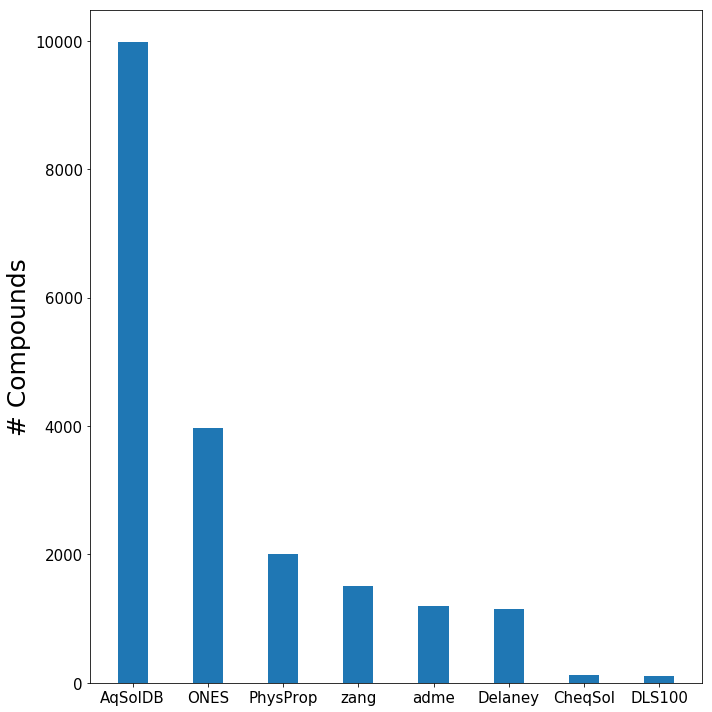

In [218]:
f1 = plt.figure(figsize=(10,10))
ax1 = f1.add_subplot(111)

ax1.axes.bar(count.index.tolist(), \
             count['logS'].tolist(), width=0.4)

#ax1.set_xlabel('Datasets', fontsize=25)
ax1.set_ylabel('# Compounds', fontsize=25)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.xaxis.labelpad = 20
plt.tight_layout()

f1.savefig('/Users/dongdongzhang/Desktop/group/ws/datasets.svg', format='svg', dpi=1200)

In [219]:
commons = list(set(others_use['InChI'].tolist()) & set(df_all['InChI'].tolist()))

In [220]:
len(commons)

9982

All Compounds in AqsolDB can be found in previously collected datasets.

In [221]:
only_in_df_all = list(set(df_all['InChI'].tolist()) - set(others_use['InChI'].tolist()))

In [222]:
len(only_in_df_all)

264

There are 264 compounds that are only stored in our previously collected data. Let's check how many duplicates in these 264 compounds.

In [223]:
inchi_logs = {}
for inchi in only_in_df_all:
    inchi_logs[inchi] = df_all[df_all['InChI'] == inchi]['logS'].tolist()

In [224]:
inchi_source = {}
for inchi in only_in_df_all:
    inchi_source[inchi] = df_all[df_all['InChI'] == inchi]['source'].tolist()

In [225]:
len(inchi_logs), len(inchi_source)

(264, 264)

In [226]:
unique_df_all = []
for inchi in list(inchi_logs):
    if len(inchi_logs[inchi]) == 1:
        unique_df_all.append(inchi)

In [227]:
duplicates_df_all = []
for inchi in list(inchi_logs):
    if len(inchi_logs[inchi]) != 1:
        duplicates_df_all.append(inchi)

In [228]:
df_all_only1 = df_all[df_all['InChI'].isin(unique_df_all)].reset_index(drop=True)

In [229]:
df_all_only1.shape

(161, 4)

There are only 161 compounds that contain one value. 

In [47]:
df_all_only1.head()

,SMILES,InChI,logS,source
0,C[C@]12C3CCC(O3)[C@@]1(C)C(=O)OC2=O,"InChI=1S/C10H12O4/c1-9-5-3-4-6(13-5)10(9,2)8(1...",-3.816,PhysProp
1,OC(=O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,InChI=1S/C10H16N2O3S/c13-8(14)4-2-1-3-7-9-6(5-...,-3.046,PhysProp
2,C[C@@H](O)[C@H](N)C(O)=O,"InChI=1S/C4H9NO3/c1-2(6)3(5)4(7)8/h2-3,6H,5H2,...",-0.089,PhysProp
3,O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C6H12O6/c7-1-2(8)4(10)6(12)5(11)3(1)9...,-0.100,PhysProp
4,OC(=O)[C@@H]1CCC(=O)N1,"InChI=1S/C5H7NO3/c7-4-2-1-3(6-4)5(8)9/h3H,1-2H...",0.567,PhysProp


In [230]:
import numpy as np

In [231]:
df_all_only2 = {}
for inchi in duplicates_df_all:
    if np.std(inchi_logs[inchi]) <= 0.01:
        df_all_only2[inchi] = np.average(inchi_logs[inchi])

In [232]:
df_all_only2dataframe = pd.DataFrame.from_dict(df_all_only2, orient='index')

In [233]:
df_all_only2dataframe['InChI'] = df_all_only2dataframe.index

In [234]:
df_all_only2dataframe.index = range(len(df_all_only2dataframe))

In [235]:
df_all_only2dataframe = df_all_only2dataframe.rename(columns={0: 'logS'})

In [236]:
df_all_only2dataframe['Mol'] = [Chem.MolFromInchi(i) for i in df_all_only2dataframe['InChI']]

In [237]:
df_all_only2dataframe['SMILES'] = [Chem.MolToSmiles(i) for i in df_all_only2dataframe['Mol']]

In [238]:
df_all_only2dataframe_1 = df_all_only2dataframe[['SMILES', 'InChI', 'logS']]

In [239]:
sources = [inchi_source[i] for i in df_all_only2dataframe_1['InChI']]

In [240]:
len(sources), len(df_all_only2dataframe_1)

(73, 73)

There are 73 compounds that have multiple values with variance less than 0.01.

In [241]:
df_all_only2dataframe_1['source'] = None

In [242]:
df_all_only2dataframe_1.head()

,SMILES,InChI,logS,source
0,O=C(O)C=Cc1ccco1,"InChI=1S/C7H6O3/c8-7(9)4-3-6-2-1-5-10-6/h1-5H,...",-1.839,None
1,C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C...,InChI=1S/C21H28O5/c1-20-7-6-13(24)8-12(20)2-3-...,-3.850,None
2,CCN(C)CC,"InChI=1S/C5H13N/c1-4-6(3)5-2/h4-5H2,1-3H3",0.713,None
3,ClC=CCCl,"InChI=1S/C3H4Cl2/c4-2-1-3-5/h1-2H,3H2",-2.045,None
4,CC(=O)OC1(C(=O)CO)C(C)CC2C3CCC4=CC(=O)C=CC4(C)...,InChI=1S/C24H31FO6/c1-13-9-18-17-6-5-15-10-16(...,-4.900,None


In [243]:
for i in range(df_all_only2dataframe_1.shape[0]):
    df_all_only2dataframe_1.at[i, 'source'] = sources[i]

So we combine AqSolDB database, compounds from our previously collected database.

In [244]:
df_all_processed = pd.concat([others_use[['SMILES', 'InChI', 'logS']], df_all_only1[['SMILES', 'InChI', 'logS']], df_all_only2dataframe_1[['SMILES', 'InChI', 'logS']]]).reset_index(drop=True)

In [245]:
all_sources = []
for df in [others_use, df_all_only1, df_all_only2dataframe_1]:
    for source in df['source'].tolist():
        all_sources.append(source)

In [246]:
df_all_processed['source'] = None

In [247]:
len(all_sources), df_all_processed.shape

(10216, (10216, 4))

In [248]:
for i in range(df_all_processed.shape[0]):
    df_all_processed.at[i, 'source'] = all_sources[i]

In [249]:
import matplotlib.pyplot as plt

## 10. Solubility challenge new

In [250]:
test1 = pd.read_csv('/Users/dongdongzhang/Desktop/group/ws/test1.csv')
test2 = pd.read_csv('/Users/dongdongzhang/Desktop/group/ws/test2.csv')

In [300]:
test2.head()

,COMPOUND,Interlab. SD,Num. Lit. Sources,Experimental mp (`C),log Poct-water calc in RDKit,log S0 calc by GSE,SMILES
0,Amantadine,0.50,3,180,1.91,-2.96,C1C2CC3CC1CC(C2)(C3)N
1,Amiodarone,0.50,5,156,6.94,-7.75,CCCCC1=C(C2=CC=CC=C2O1)C(=O)C3=CC(=C(C(=C3)I)O...
2,Amodiaquine,0.65,3,208,5.18,-6.51,CCN(CC)CC1=C(C=CC(=C1)NC2=C3C=CC(=CC3=NC=C2)Cl)O
3,Bisoprolol,0.59,3,100,2.37,-2.62,CC(C)NCC(COC1=CC=C(C=C1)COCCOC(C)C)O
4,Bromocriptine,0.51,5,217,3.19,-4.61,CC(C)CC1C(=O)N2CCCC2C3(N1C(=O)C(O3)(C(C)C)NC(=...


In [252]:
test1['SMILES'] = [getsmi(i) for i in test1['COMPOUND']]

In [253]:
test2['SMILES'] = [getsmi(i) for i in test2['COMPOUND']]

In [255]:
test1.shape, test2.shape

((100, 7), (32, 7))

In [258]:
test1.head()

,COMPOUND,Interlab. SD,Num. Lit. Sources,Experimental mp (`C),log Poct-water calc in RDKit,log S0 calc by GSE,SMILES
0,Acetazolamide,0.18,11,259,-0.86,-0.98,CC(=O)NC1=NN=C(S1)S(=O)(=O)N
1,Acetylsalicylic_Acid,0.15,16,142,1.31,-1.98,None
2,Alclofenac,0.16,4,92,2.53,-2.70,C=CCOC1=C(C=C(C=C1)CC(=O)O)Cl
3,Ambroxol,0.17,3,234,3.19,-4.78,C1CC(CCC1NCC2=C(C(=CC(=C2)Br)Br)N)O
4,Aripiprazole,0.21,3,139,4.86,-5.50,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...


In [259]:
test1_use = test1[~pd.isnull(test1['SMILES'])].reset_index(drop=True)

In [260]:
test2_use = test2[~pd.isnull(test2['SMILES'])].reset_index(drop=True)

In [262]:
test1_use['Mol'] = [Chem.MolFromSmiles(i) for i in test1_use['SMILES']]
test1_use['InChI'] = [Chem.MolToInchi(i) for i in test1_use['Mol']]

In [263]:
test2_use['Mol'] = [Chem.MolFromSmiles(i) for i in test2_use['SMILES']]
test2_use['InChI'] = [Chem.MolToInchi(i) for i in test2_use['Mol']]

RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [14:46:02] WARNING: Omitted undefined stereo
RDKit WARNING: [15:05:29] WARNING: Omitted undefined stereo
RDKit WARNING: [15:05:29] WARNING: Omitted undefined stereo
RDKit WARNING: [15:05:29] WARNING: Omitted undefined stereo
RDKit WARNING: [15:05:29] WARNING: Omitted undefined stereo
RDKit WARNING: [15:05:29] WARNING: Omitt

In [264]:
test1_use.to_csv('/Users/dongdongzhang/Desktop/group/ws/test1_procssed.csv', index=False)
test2_use.to_csv('/Users/dongdongzhang/Desktop/group/ws/test2_procssed.csv', index=False)

# 11. eliminate test sets from df_all and put constraints on element and molecular weight

Elinamte common compounds in test1

In [266]:
df_all_processed.shape

(10216, 4)

Elinamte common compounds in test3

In [301]:
common3 = list(set(df_all_processed['InChI'].tolist()) & set(test['InChI'].tolist()))

In [302]:
len(common3)

503

In [305]:
df_all_only3 = df_all_processed.loc[~df_all_processed['InChI'].isin(common3)].reset_index(drop=True)

In [306]:
df_all_only3.shape

(9713, 4)

In [307]:
df_all_only3['Mol'] = [Chem.MolFromSmiles(i) for i in df_all_only3['SMILES']]

RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:21:30] WARNING: not r

In [281]:
from collections import Counter

find elements and MW for all compounds and elimate some "outer" compounds.

In [308]:
df_all_only3['element_'] = df_all_only3['Mol'].apply(lambda x: list(Counter(atom.GetSymbol() for atom in x.GetAtoms()).keys()))

In [309]:
ALLOWABLE_ATOM_SYMBOLS = ['H', 'C', 'N', 'O', 'S', 'F', 'I', 'P', 'Cl', 'Br']

df_all_only3['filter'] = df_all_only3['element_'].apply(lambda x: True if set(x) < set(ALLOWABLE_ATOM_SYMBOLS) else False)

all_use = df_all_only3[df_all_only3['filter']].reset_index(drop=True)

In [310]:
all_use.shape

(8766, 7)

In [285]:
from rdkit.Chem.Descriptors import ExactMolWt

In [311]:
all_use['MW'] = [ExactMolWt(i) for i in all_use['Mol']]

In [312]:
all_use1 = all_use[all_use['MW'] < 1000].reset_index(drop=True)

In [313]:
all_use1.shape

(8736, 8)

,SMILES,InChI,logS,source,Mol,element_,filter,MW
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,-3.616127,AqSolDB,,"[Br, C, N]",True,391.281363
1,O=C1Nc2cccc3cccc1c23,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,-3.254767,AqSolDB,,"[O, C, N]",True,169.052764
2,Clc1ccc(C=O)cc1,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,-2.177078,AqSolDB,,"[Cl, C, O]",True,140.002892
3,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,-4.662065,AqSolDB,,"[C, O, N]",True,422.220557
4,Cc1cccc(C=C)c1,"InChI=1S/C9H10/c1-3-9-6-4-5-8(2)7-9/h3-7H,1H2,2H3",-3.123150,AqSolDB,,[C],True,118.078250

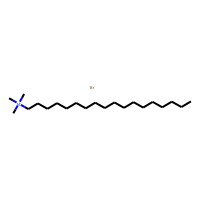
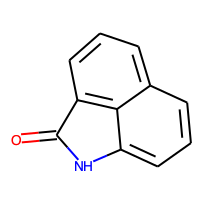
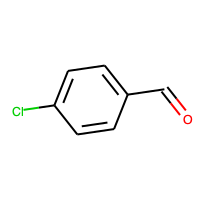
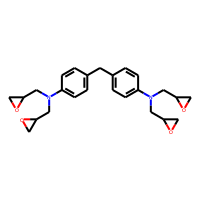
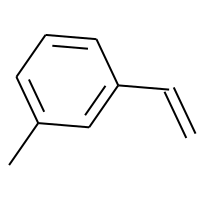

In [289]:
all_use1.head()

In [314]:
all_use1.shape

(8736, 8)

In [315]:
test.shape

(503, 7)

In [318]:
all_use1[['SMILES', 'InChI', 'logS']].to_csv('/Users/dongdongzhang/Desktop/group/ws/ws_trainVal_processed_new.csv', index=False)

## 12. Statistics

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

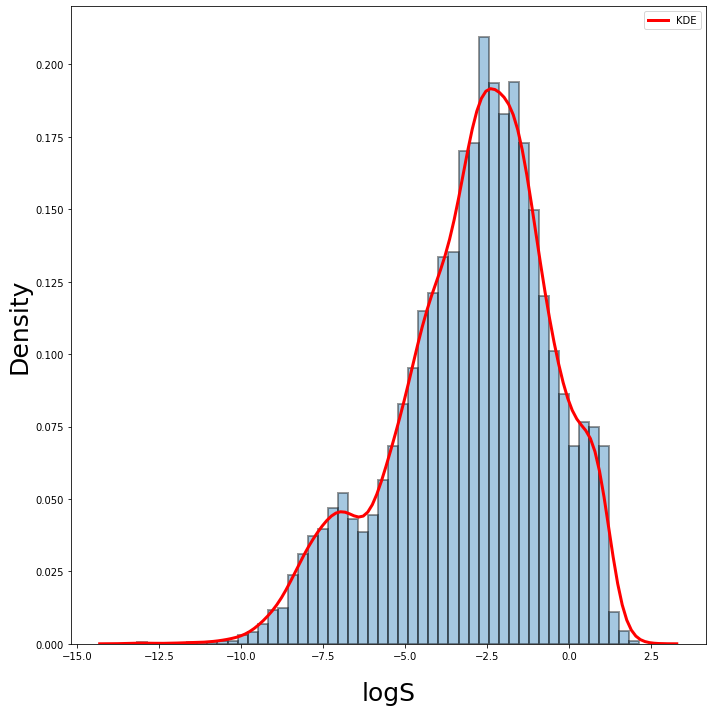

In [11]:
f2 = plt.figure(figsize=(10,10))
ax2 = f2.add_subplot(111)
sns.distplot(df_all['logS'], kde_kws={"color":"red", "lw": 3, "label": "KDE"}, hist_kws=dict(edgecolor="k", linewidth=2), ax=ax2)

ax2.set_xlabel('logS', fontsize=25)
ax2.set_ylabel('Density', fontsize=25)
ax2.xaxis.labelpad = 20
plt.tight_layout()

In [12]:
f2.savefig('/beegfs/dz1061/datasets/ws/logS_distribution.svg', format='svg', dpi=1200)

In [15]:
df_all['Mol'] = [Chem.MolFromSmiles(i) for i in df_all['SMILES']]

In [16]:
df_all['MW'] = [ExactMolWt(i) for i in df_all['Mol']]

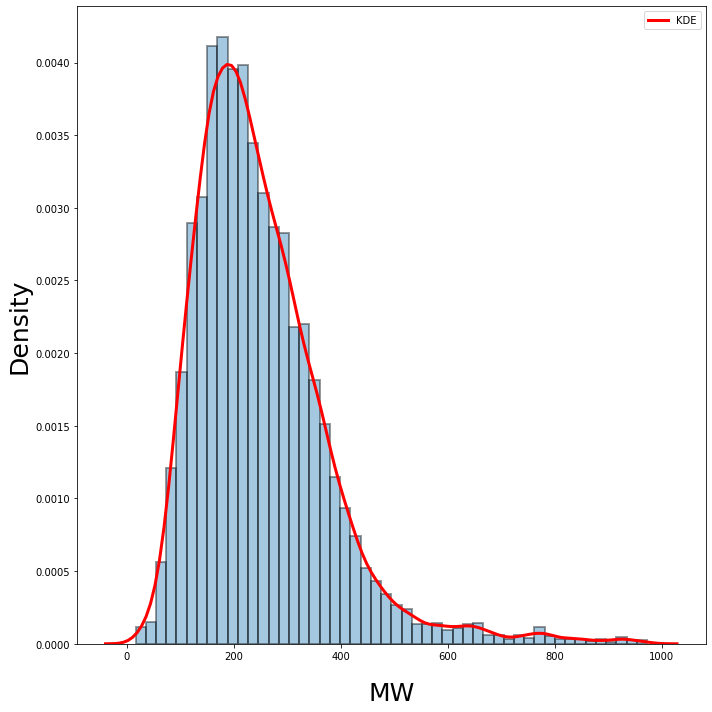

In [17]:
f3 = plt.figure(figsize=(10,10))
ax3 = f3.add_subplot(111)
sns.distplot(df_all['MW'], kde_kws={"color":"red", "lw": 3, "label": "KDE"}, hist_kws=dict(edgecolor="k", linewidth=2), ax=ax3)

ax3.set_xlabel('MW', fontsize=25)
ax3.set_ylabel('Density', fontsize=25)
ax3.xaxis.labelpad = 20
plt.tight_layout()

In [20]:
f3.savefig('/beegfs/dz1061/datasets/ws/ws_mw_distribution.svg', format='svg', dpi=1200)

## 13. Statistics of test set from Solubility Challenge

In [6]:
test1['Mol'] = [Chem.MolFromSmiles(i) for i in test1['SMILES']]
test2['Mol'] = [Chem.MolFromSmiles(i) for i in test2['SMILES']]

In [191]:
test1[pd.isnull(test1['Mol'])]

,COMPOUND,Interlab. SD,Num. Lit. Sources,Experimental mp (`C),log Poct-water calc in RDKit,log S0 calc by GSE,SMILES,Mol


In [192]:
test2[pd.isnull(test2['Mol'])]

,COMPOUND,Interlab. SD,Num. Lit. Sources,Experimental mp (`C),log Poct-water calc in RDKit,log S0 calc by GSE,SMILES,Mol


In [9]:
test1['MW'] = [ExactMolWt(i) for i in test1['Mol']]
test2['MW'] = [ExactMolWt(i) for i in test2['Mol']]

In [10]:
test1['MW'].describe()

count     100.000000
mean      338.330459
std       139.730729
min       152.033425
25%       253.820330
50%       314.531002
75%       395.151498
max      1201.841368
Name: MW, dtype: float64

In [11]:
test2['MW'].describe()

count     32.000000
mean     408.374344
std      161.924145
min      151.136100
25%      313.832030
50%      362.122726
75%      472.383134
max      846.441509
Name: MW, dtype: float64

,COMPOUND,Interlab. SD,Num. Lit. Sources,Experimental mp (`C),log Poct-water calc in RDKit,log S0 calc by GSE,SMILES,Mol,MW
27,Cyclosporine_A,0.16,6,151,3.27,-4.03,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C,,1201.841368

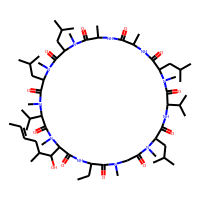

In [198]:
test1[test1['MW'] > 800]

,COMPOUND,Interlab. SD,Num. Lit. Sources,Experimental mp (`C),log Poct-water calc in RDKit,log S0 calc by GSE,SMILES,Mol,MW
25,Rifabutin,0.66,3,176,4.62,-5.63,CC1C=CC=C(C(=O)N=C2C(=C3C(=C4C2=NC5(N4)CCN(CC5)CC(C)C)C6=C(C(=C3O)C)OC(C6=O)(OC=CC(C(C(C(C(C(C1O)C)O)C)OC(=O)C)C)OC)C)O)C,,846.441509

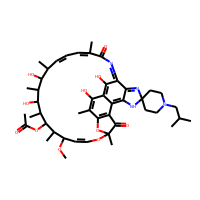

In [199]:
test2[test2['MW'] > 800]